In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

In [2]:
def get_recoil_pattern(file, start_index=0, end_index=None):
    df = pd.read_json(file).set_index("frame")
    
    # Trim df:
    if end_index:
        df = df.iloc[:end_index]
    df = df.iloc[start_index:]

    df[["reticle_x", "reticle_y"]] = pd.DataFrame(df.reticle.tolist(), index= df.index)
    df[["camera_x", "camera_y"]] = pd.DataFrame(df["camera recoil"].tolist(), index= df.index)
    df.drop(columns=["camera recoil", "reticle"], inplace=True)

    for col in df.columns:
        if col == "filename":
            continue
            
        df["base"] = df[col].iloc[0]
        df[col] = df[col] - df.base
        df.drop(columns=["base"], inplace=True)

    df["combined_x"] = df.reticle_x + df.camera_x
    df["combined_y"] = df.reticle_y + df.camera_y
    df["combined_y_move"] = df.combined_y - df.combined_y.shift(1)
    df["combined_y_color"] = df.combined_y_move.apply(lambda x: "red" if x > 0 else "blue")
    
    return df

The max recoil height for AK74N Crouched - 46 Recoil was 94
The max recoil height for AK74N Standing - 46 Recoil was 137
The max recoil height for AKM Crouched - 51 Recoil was 98
The max recoil height for AKM Standing - 51 Recoil was 133


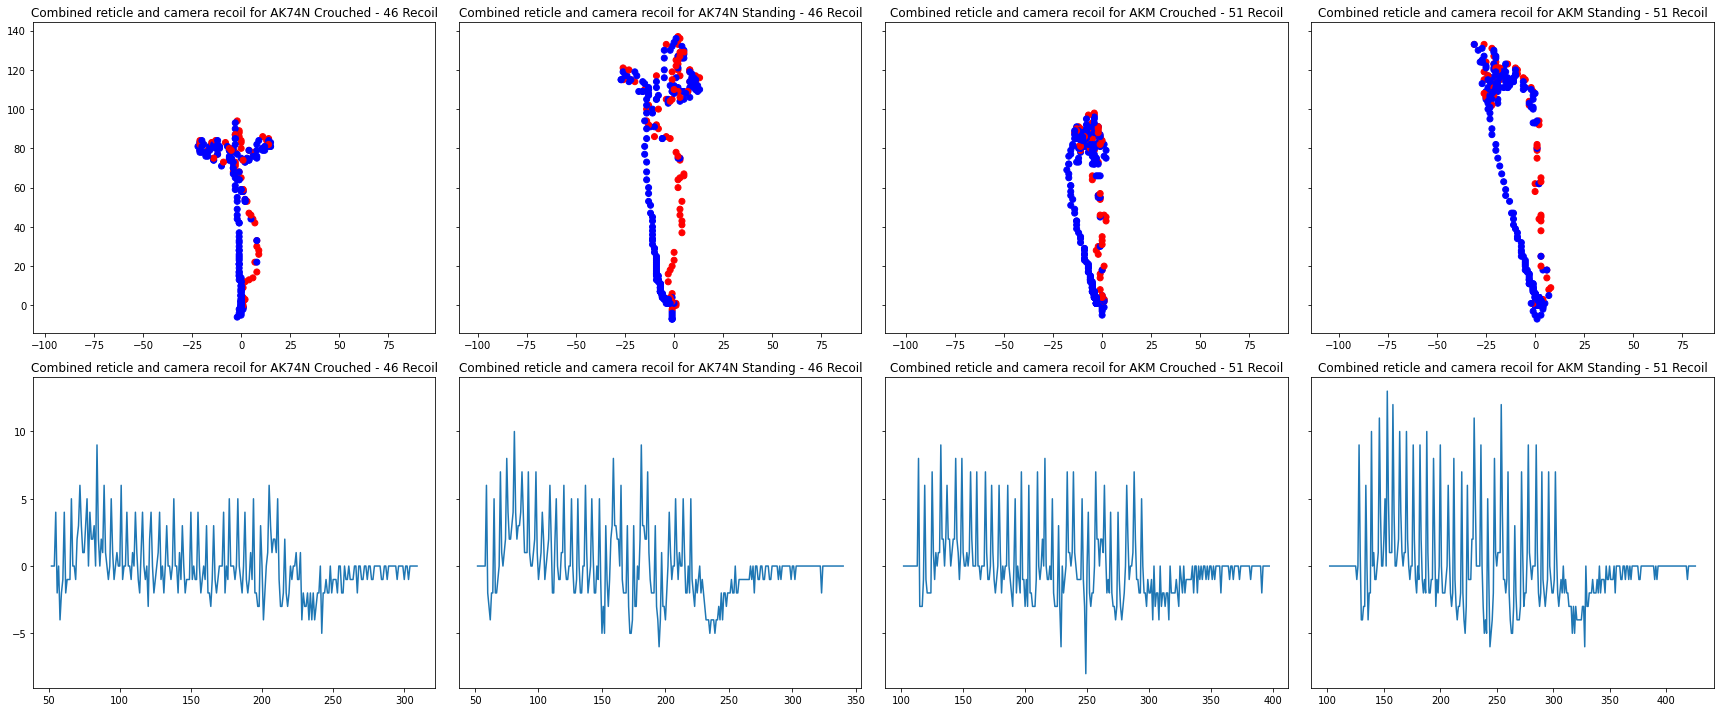

In [13]:
data = [
    {
        "file": "recoil data/ak74n_crouched_46.json",
        "name": "AK74N Crouched - 46 Recoil",
        "start_index": 50
    },
    {
        "file": "recoil data/ak74n_standing_46.json",
        "name": "AK74N Standing - 46 Recoil",
        "start_index": 50
    },
    {
        "file": "recoil data/akm_crouched_51.json",
        "name": "AKM Crouched - 51 Recoil",
        "start_index": 100
    },
    {
        "file": "recoil data/akm_standing_51.json",
        "name": "AKM Standing - 51 Recoil",
        "start_index": 100
    }
]

plots = len(data)
width = 6 * plots
fig, axs = plt.subplots(2, plots, figsize=(width, 10), sharey='row')

for i, gun in enumerate(data):
    file = gun["file"]
    name = gun["name"]
    start_index = gun["start_index"]
    df = get_recoil_pattern(file, start_index=start_index)
    print(f"The max recoil height for {name} was {df.combined_y.max():.0f}")
    
    # Spray pattern plotted:
    axs[0][i].scatter(df.combined_x, df.combined_y, c=df.combined_y_color)
    axs[0][i].set_title(f"Combined reticle and camera recoil for {name}")
    axs[0][i].axis('equal')

    # Movement plotted:
    axs[1][i].plot(df.index, df.combined_y_move)
    axs[1][i].set_title(f"Combined reticle and camera recoil for {name}")
    

fig.tight_layout()

plt.show()